[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/class_code_samples/ex01_fullyconnected_neural_network_vs_cnn.ipynb.ipynb)

In [1]:
# If you didn't already, run the following command in your terminal to install the necessary libraries. Use the following command:
# pip install tensorflow numpy matplotlib

# PART 1: FULLY CONNECTED (MULTI-LAYER PERCEPTRON / "MLP") MODEL

In [2]:
# PART 1: FULLY CONNECTED (MULTI-LAYER PERCEPTRON / "MLP") MODEL


# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense

# Load and preprocess data
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define input layer
input_layer = Input(shape=(28, 28))
x = Flatten()(input_layer)
x = Dense(512, activation='relu')(x)  # Hidden Layer 1
x = Dense(256, activation='relu')(x)  # Hidden Layer 2
output_layer = Dense(10, activation='softmax')(x)

# Build and compile model
mlp_model = Model(inputs=input_layer, outputs=output_layer)
mlp_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display model summary
mlp_model.summary()

# Train model and save history
mlp_history = mlp_model.fit(train_images, train_labels, epochs=10, verbose=1)

# Evaluate model
test_loss, test_accuracy = mlp_model.evaluate(test_images, test_labels)
print("\nMLP Test accuracy:", test_accuracy)




# PART 2: CONVOLUTIONAL NEURAL NETWORK (CNN) MODEL:

In [ ]:
# Import additional layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# Reshape the data
train_images_cnn = train_images.reshape(-1, 28, 28, 1)
test_images_cnn = test_images.reshape(-1, 28, 28, 1)

# Define CNN layers
input_layer_cnn = Input(shape=(28, 28, 1))
x = Conv2D(16, (3, 3), activation='relu')(input_layer_cnn)  # Reduced filters
x = MaxPooling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu')(x)  # Reduced filters
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)  # Reduced neurons
output_layer_cnn = Dense(10, activation='softmax')(x)

# Build and compile CNN model
cnn_model = Model(inputs=input_layer_cnn, outputs=output_layer_cnn)
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display model summary
cnn_model.summary()

# Train model and save history
cnn_history = cnn_model.fit(train_images_cnn, train_labels, epochs=10, verbose=1)

# Evaluate model
test_loss_cnn, test_accuracy_cnn = cnn_model.evaluate(test_images_cnn, test_labels)
print("\nCNN Test accuracy:", test_accuracy_cnn)


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 800)               0   

# PART 3: COMPARING MODELS' RESULTS

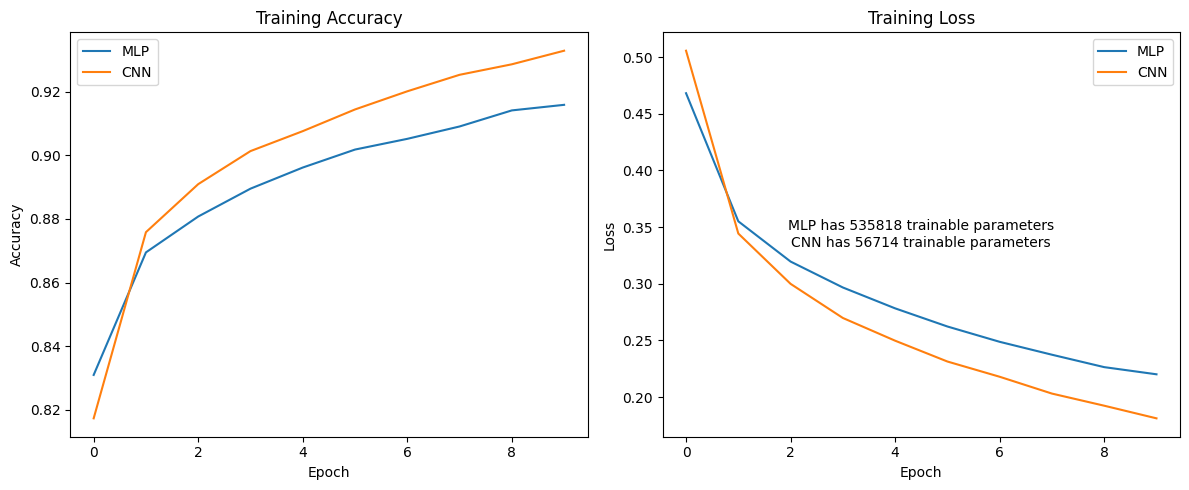

In [ ]:

# Plotting
plt.figure(figsize=(12, 5))

# Plotting accuracy
plt.subplot(1, 2, 1)
plt.plot(mlp_history.history['accuracy'], label='MLP')
plt.plot(cnn_history.history['accuracy'], label='CNN')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(mlp_history.history['loss'], label='MLP')
plt.plot(cnn_history.history['loss'], label='CNN')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Adding text annotation comparing number of parameters
plt.text(0.5, 0.5, f"MLP has {mlp_model.count_params()} trainable parameters\nCNN has {cnn_model.count_params()} trainable parameters", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()
